In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/Infi-09/Tesla-Stock-Price-Prediction/main/tesla.csv")

In [4]:
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


## Data Ingestion:
Import the required libraries ,
Load the Dataset ,
Load the time series data into a pandas dataframe ,
Set the dataframe column as the index of the dataframe ,
Check the datatype of the index & convert it to date-time if necessary.

## Univariate Time Series Analysis
Only applicable for one feature:

In [5]:
data.shape

(1692, 7)

In [6]:
stock = data[["Date","Close"]]

In [7]:
stock

,Date,Close
0,6/29/2010,23.889999
1,6/30/2010,23.830000
2,7/1/2010,21.959999
3,7/2/2010,19.200001
4,7/6/2010,16.110001
...,...,...
1687,3/13/2017,246.169998
1688,3/14/2017,258.000000
1689,3/15/2017,255.729996
1690,3/16/2017,262.049988


In [8]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1692 non-null   object 
 1   Close   1692 non-null   float64
dtypes: float64(1), object(1)
memory usage: 26.6+ KB


In [9]:
# convert the Date column to Date-time

In [10]:
stock['Date']=pd.to_datetime(stock['Date'])

In [11]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1692 non-null   datetime64[ns]
 1   Close   1692 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 26.6 KB


In [12]:
stock = stock.set_index("Date")

In [13]:
stock

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001
...,...
2017-03-13,246.169998
2017-03-14,258.000000
2017-03-15,255.729996


# Why we convert the data such like that ?
* I can easily retrieve the data.
* Visualization is also simple.
* Libraries are designed in a way that they requires Date as the Index ( Scipy Statsmodel)

# EDA.

* Compute Basic Statistics.
* Visualize the Time Series Model.
* Plot the T.S. Data.
* Plot the rolling mean & S.D.
* Decompose the Time Series model to Check the Trends , Seasonality , Noise , Fluctutions.
* Stationarity Check.
* Apply D.F. & A.D.F. Test.
* Check for Auto-Correlation.
* Plot the ACF and PACF to identify the ARIMA Model.
* Outliers/Anomaly Detection.

In [14]:
stock.describe()

,Close
count,1692.000000
mean,132.428658
std,94.313187
min,15.800000
25%,29.884999
50%,158.160004
75%,220.022503
max,286.040009


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
import numpy as np

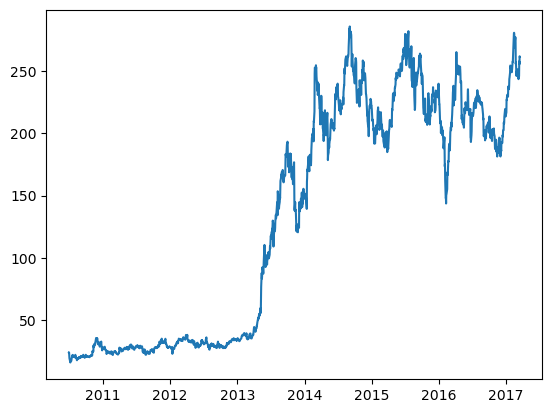

In [17]:
plt.plot(stock.Close)

(array([698.,  23.,  14.,  41.,  58.,  65., 197., 311., 205.,  80.]),
 array([ 15.8      ,  42.8240009,  69.8480018,  96.8720027, 123.8960036,
        150.9200045, 177.9440054, 204.9680063, 231.9920072, 259.0160081,
        286.040009 ]),
 <BarContainer object of 10 artists>)

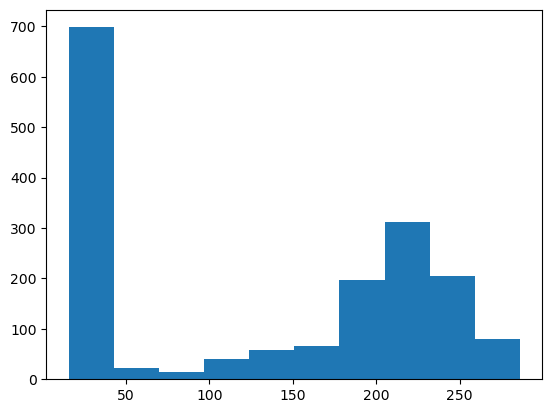

In [18]:
plt.hist(stock.Close)

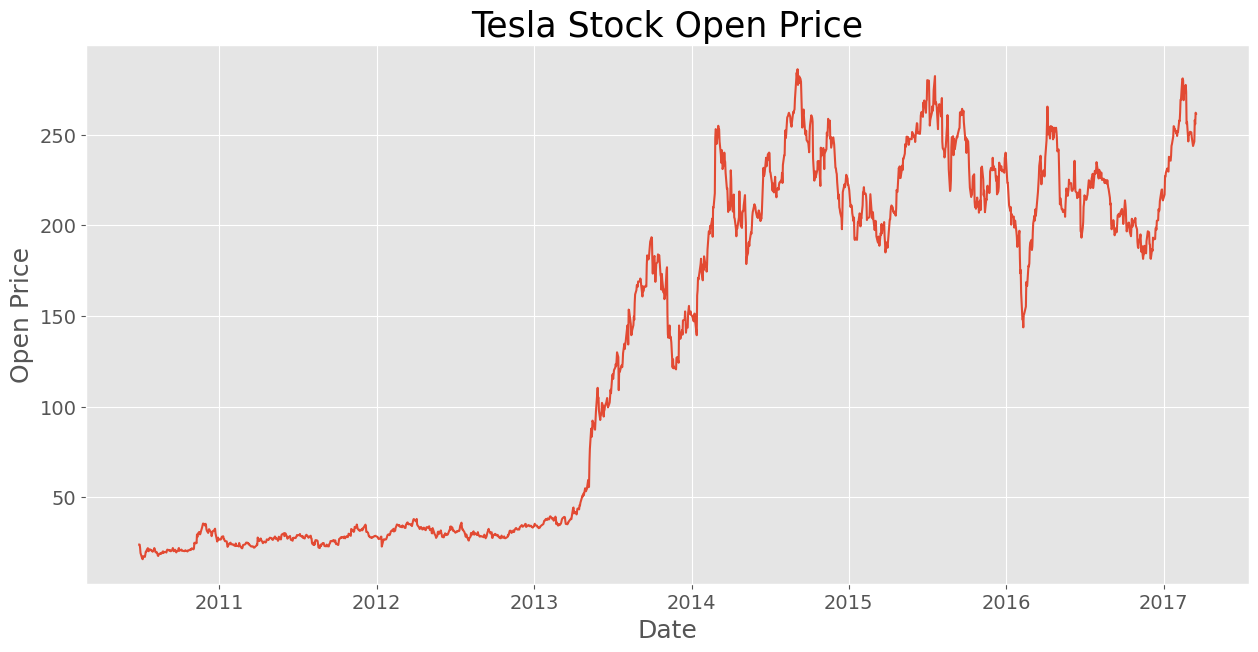

In [19]:
plt.style.use("ggplot")
plt.figure(figsize = (15,7))
plt.grid(True)
plt.plot(stock["Close"])
plt.xlabel("Date",fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel("Open Price",fontsize=18)
plt.yticks(fontsize=14)
plt.title("Tesla Stock Open Price",fontsize=25)
plt.show()        

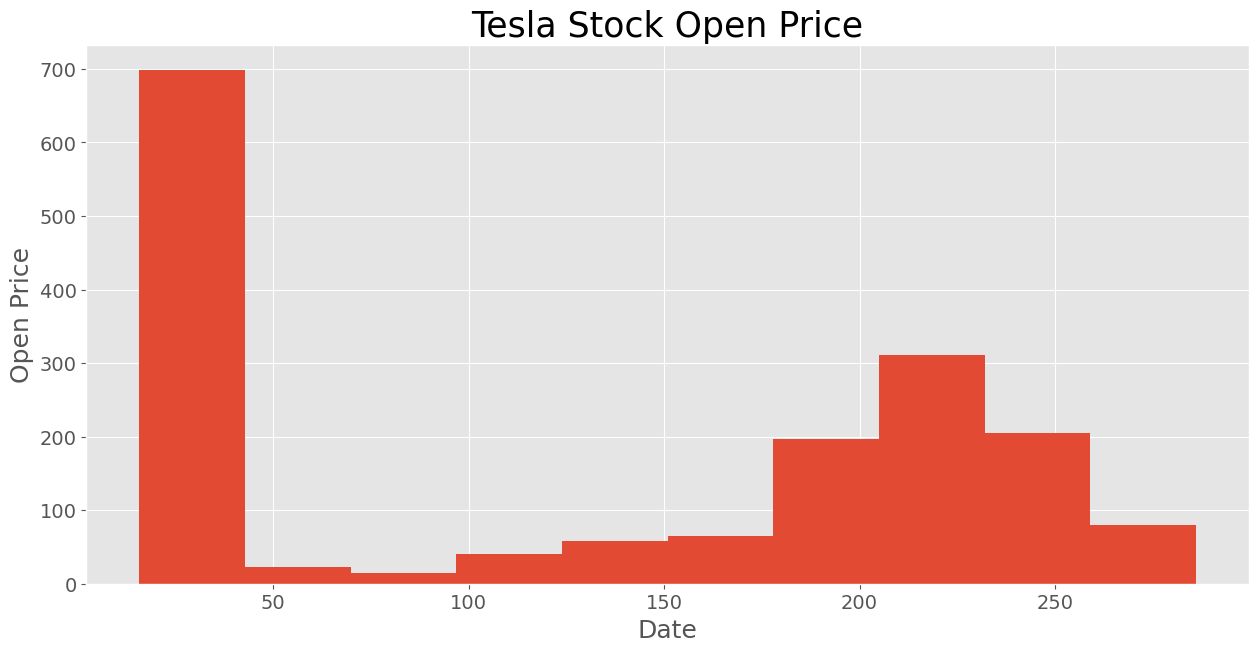

In [20]:
plt.style.use("ggplot")
plt.figure(figsize = (15,7))
plt.grid(True)
plt.hist(stock.Close)
plt.xlabel("Date",fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel("Open Price",fontsize=18)
plt.yticks(fontsize=14)
plt.title("Tesla Stock Open Price",fontsize=25)
plt.show()

Rolling Mean and S.D.

In [21]:
stock['Close'].rolling(3).mean()

Date
2010-06-29           NaN
2010-06-30           NaN
2010-07-01     23.226666
2010-07-02     21.663333
2010-07-06     19.090000
                 ...    
2017-03-13    244.919998
2017-03-14    249.286667
2017-03-15    253.299998
2017-03-16    258.593328
2017-03-17    259.759995
Name: Close, Length: 1692, dtype: float64

In [22]:
stock['Close'].rolling(3).std()

Date
2010-06-29         NaN
2010-06-30         NaN
2010-07-01    1.097376
2010-07-02    2.329212
2010-07-06    2.926550
                ...   
2017-03-13    1.240119
2017-03-14    7.647171
2017-03-15    6.278209
2017-03-16    3.201500
2017-03-17    3.500898
Name: Close, Length: 1692, dtype: float64

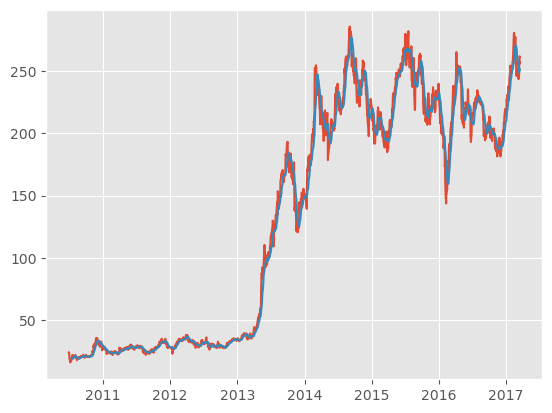

In [23]:
plt.plot(stock.Close)
plt.plot(stock['Close'].rolling(12).mean())

Rolling mean and s.d. is used for smoothning of the data.

# Stationarity Check:

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
adft = adfuller(stock['Close'])

In [26]:
adft

(-0.8137329693176604,
 0.8150547908640402,
 0,
 1691,
 {'1%': -3.434223006770802,
  '5%': -2.8632507142793737,
  '10%': -2.5676807398860144},
 9682.930875000338)

In [27]:
pd.Series(adft[0:4],index=["Test Stats","p-value","lag","data-point"])

Test Stats      -0.813733
p-value          0.815055
lag              0.000000
data-point    1691.000000
dtype: float64

# * Concept!
* The Augmented Dickey-Fuller (ADF) test checks for unit roots, which indicate whether a time series has a persistent trend or non-stationarity. If the test's p-value is below a certain threshold (commonly 0.05), it suggests that the time series does not have a unit root and is stationary.

 
* The analysis begins with the regression model where the lag order is p and reduces the order sequentially. The lag order for the test is the first regression model where the highest-order lag term is significant at the 0.05 level.

> Null Hypothesis : Our Data is Non - Stationary.

> Alternate Hypothesis : Our Data is Stationary.

> IF P<=0.05 (I.e. 5%) : Reject Our Null - Hypothesis.

> IF P=>0.05 : Accept the Null - Hypothesis.

In [28]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

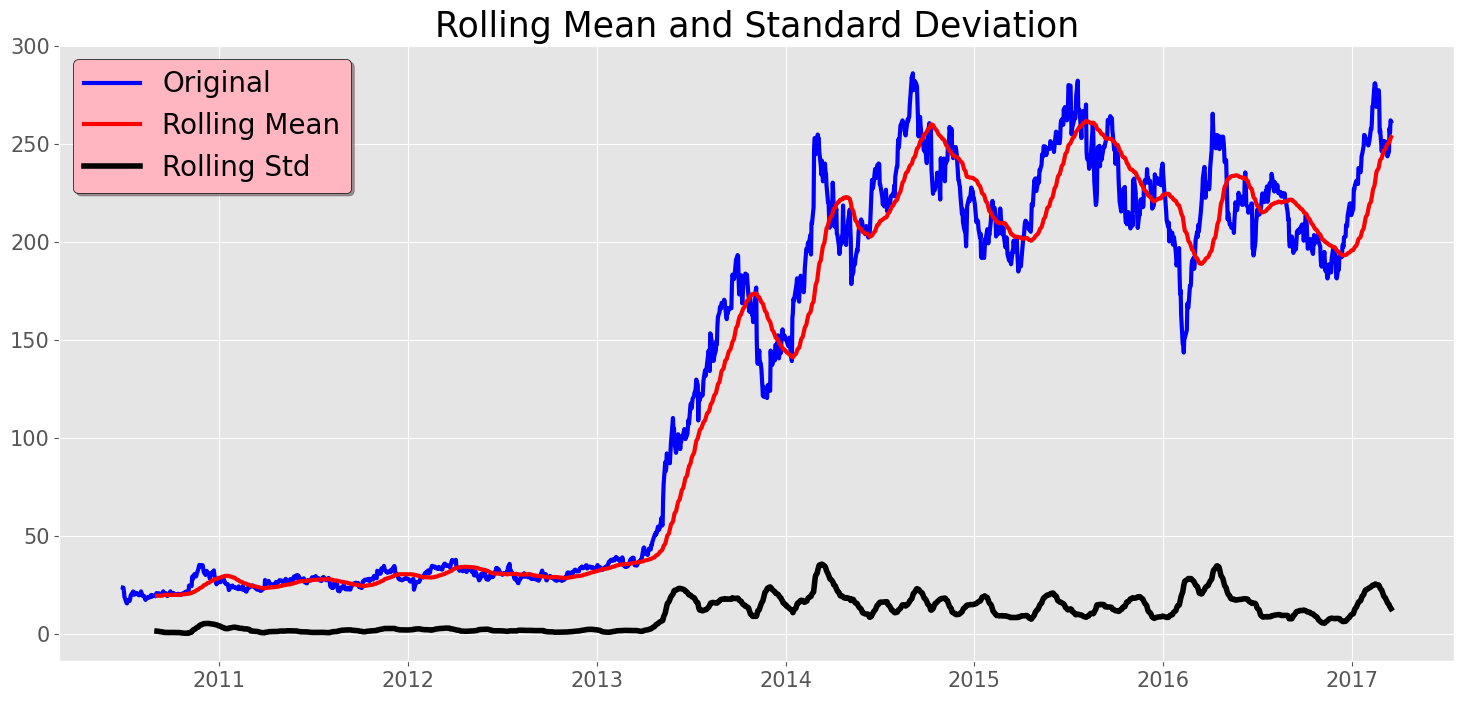

Results of dickey fuller test
Test Statistics                  -0.813733
p-value                           0.815055
No. of lags used                  0.000000
Number of observations used    1691.000000
critical value (1%)              -3.434223
critical value (5%)              -2.863251
critical value (10%)             -2.567681
dtype: float64


In [29]:
test_stationarity(stock.Close)

# Seasonal Decomposition

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock.Close , period = 30)
# By-deafult it is additive T.S. Decomposition , we can also find the multiplicative T.S. Decompotion

In [31]:
result

<Figure size 1500x1000 with 0 Axes>

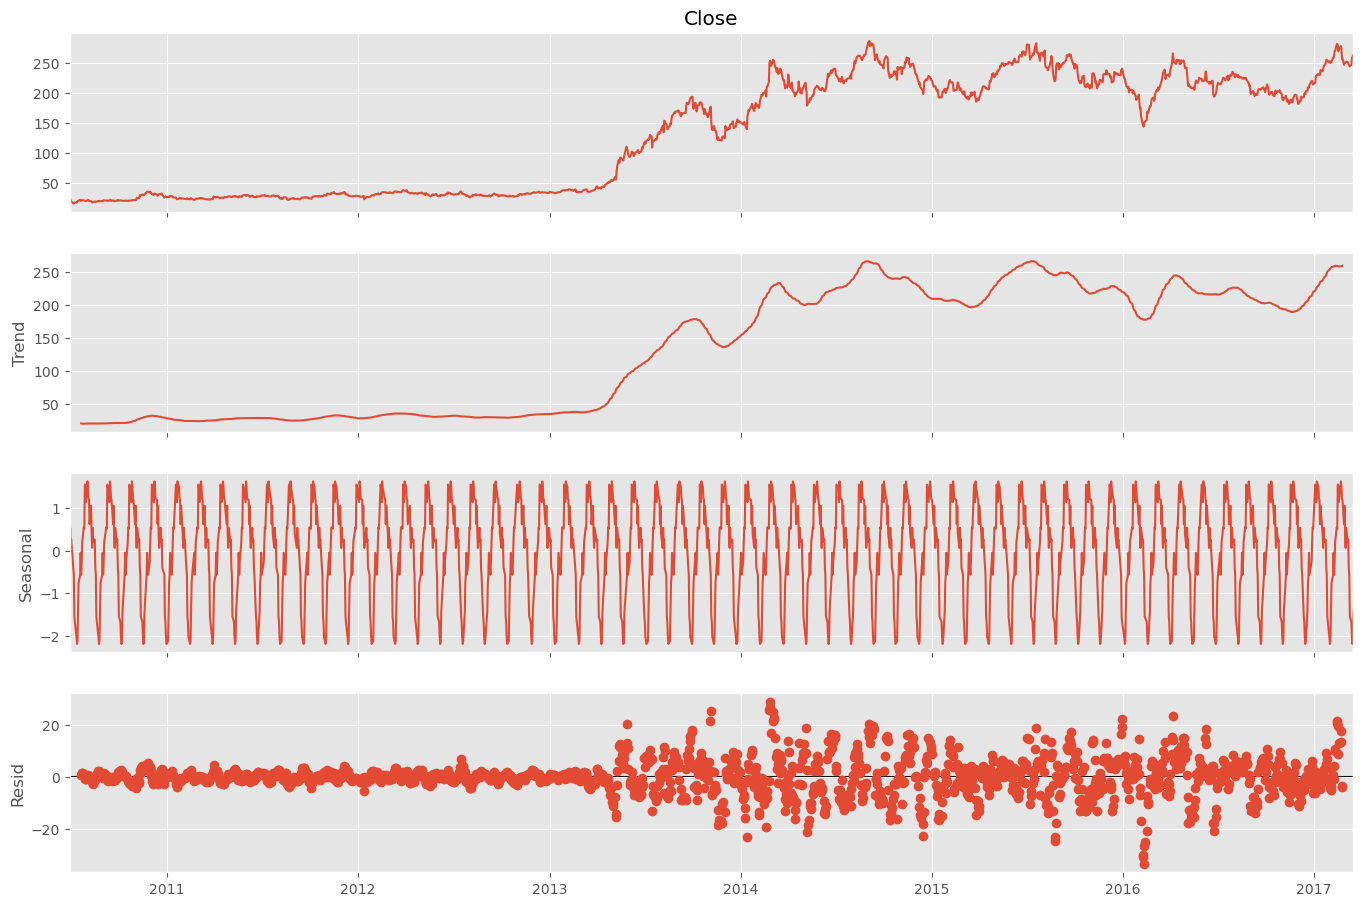

In [32]:
plt.figure(figsize=(15,10))
fig = result.plot()
fig.set_size_inches(15,10)

In [33]:
result.seasonal

Date
2010-06-29    0.066506
2010-06-30    0.539275
2010-07-01    0.210566
2010-07-02    0.262570
2010-07-06   -0.398667
                ...   
2017-03-13   -1.680606
2017-03-14   -2.035321
2017-03-15   -2.195815
2017-03-16   -2.129176
2017-03-17   -1.434170
Name: seasonal, Length: 1692, dtype: float64

In [34]:
result.resid

Date
2010-06-29   NaN
2010-06-30   NaN
2010-07-01   NaN
2010-07-02   NaN
2010-07-06   NaN
              ..
2017-03-13   NaN
2017-03-14   NaN
2017-03-15   NaN
2017-03-16   NaN
2017-03-17   NaN
Name: resid, Length: 1692, dtype: float64

In [35]:
result.trend # Residual

Date
2010-06-29   NaN
2010-06-30   NaN
2010-07-01   NaN
2010-07-02   NaN
2010-07-06   NaN
              ..
2017-03-13   NaN
2017-03-14   NaN
2017-03-15   NaN
2017-03-16   NaN
2017-03-17   NaN
Name: trend, Length: 1692, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1372b45f0>,
 'caps': [<matplotlib.lines.Line2D at 0x13724c230>,
 'boxes': [<matplotlib.lines.Line2D at 0x1372b4320>],
 'medians': [<matplotlib.lines.Line2D at 0x1372e39b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1372e0440>],
 'means': []}

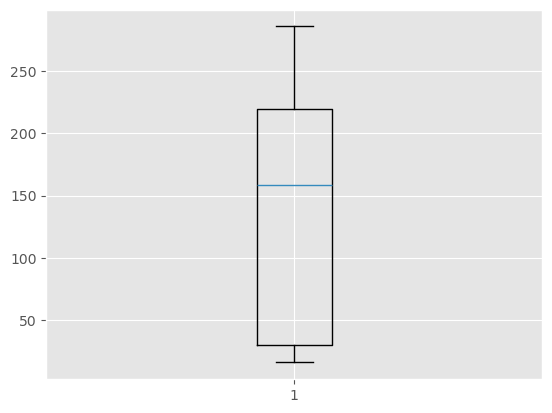

In [36]:
plt.boxplot(stock.Close)

In [37]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

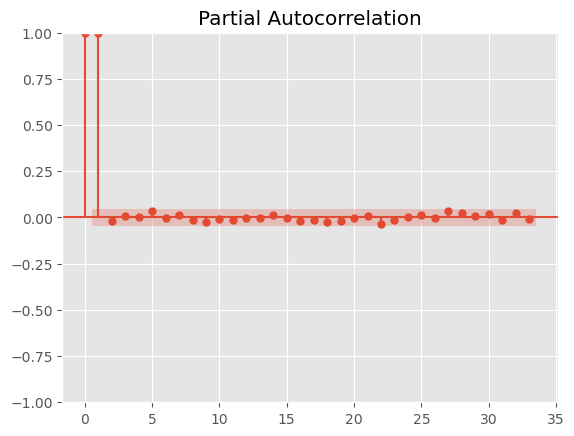

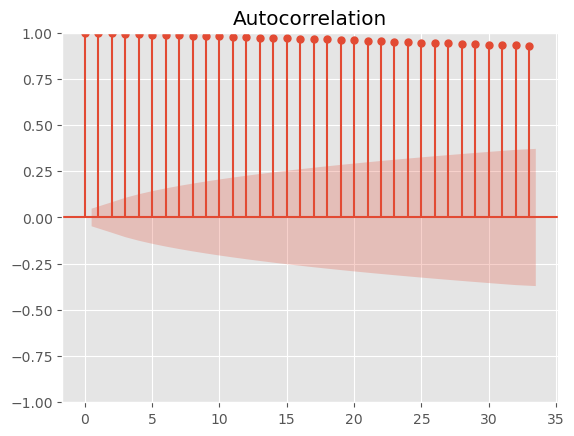

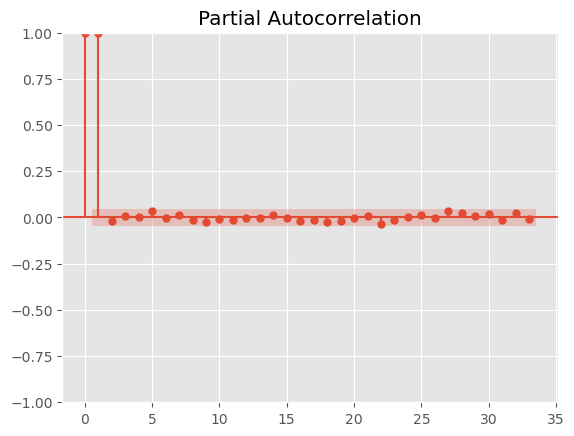

In [38]:
plot_acf(stock.Close)
plot_pacf(stock.Close)

# Preprocessing of the data

1. fill the miss(here not required)

2. convert data into the stationary time series

3. if necessary then normalize the data(here not required)

4. split the data into train and test

5. clean the data by removing the outlier(here not required)

In [39]:
df_Close = stock['Close']

In [40]:
df_Close

Date
2010-06-29     23.889999
2010-06-30     23.830000
2010-07-01     21.959999
2010-07-02     19.200001
2010-07-06     16.110001
                 ...    
2017-03-13    246.169998
2017-03-14    258.000000
2017-03-15    255.729996
2017-03-16    262.049988
2017-03-17    261.500000
Name: Close, Length: 1692, dtype: float64

In [41]:
df_Close.diff()

Date
2010-06-29          NaN
2010-06-30    -0.059999
2010-07-01    -1.870001
2010-07-02    -2.759998
2010-07-06    -3.090000
                ...    
2017-03-13     2.479996
2017-03-14    11.830002
2017-03-15    -2.270004
2017-03-16     6.319992
2017-03-17    -0.549988
Name: Close, Length: 1692, dtype: float64

In [42]:
df_Close.diff(2)

Date
2010-06-29          NaN
2010-06-30          NaN
2010-07-01    -1.930000
2010-07-02    -4.629999
2010-07-06    -5.849998
                ...    
2017-03-13     1.270004
2017-03-14    14.309998
2017-03-15     9.559998
2017-03-16     4.049988
2017-03-17     5.770004
Name: Close, Length: 1692, dtype: float64

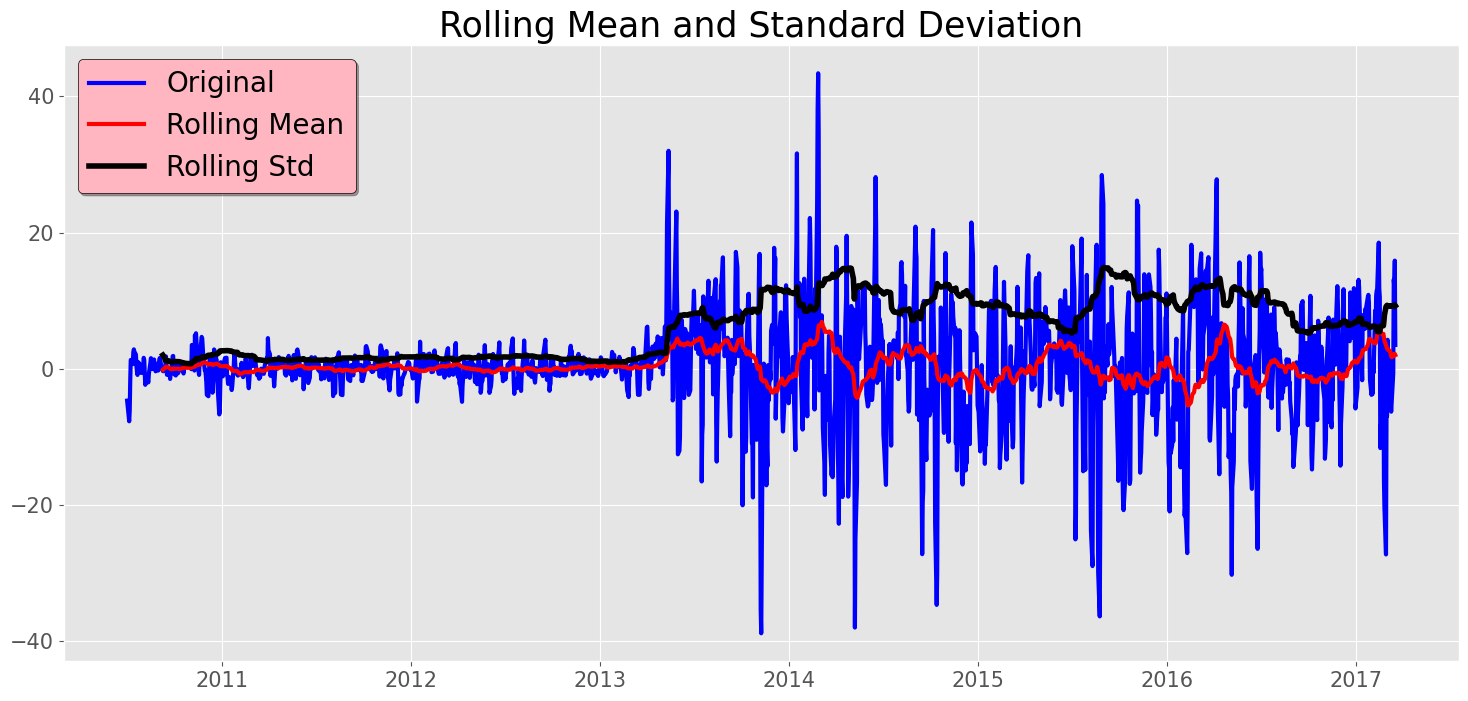

Results of dickey fuller test
Test Statistics               -7.862552e+00
p-value                        5.237091e-12
No. of lags used               2.500000e+01
Number of observations used    1.663000e+03
critical value (1%)           -3.434288e+00
critical value (5%)           -2.863280e+00
critical value (10%)          -2.567696e+00
dtype: float64


In [43]:
tsla_close_diff_3=df_Close.diff(3)
tsla_close_diff_3=tsla_close_diff_3.dropna()
test_stationarity(tsla_close_diff_3)

In [44]:
train_data=df_Close[0:-60]
test_data=df_Close[-60:]

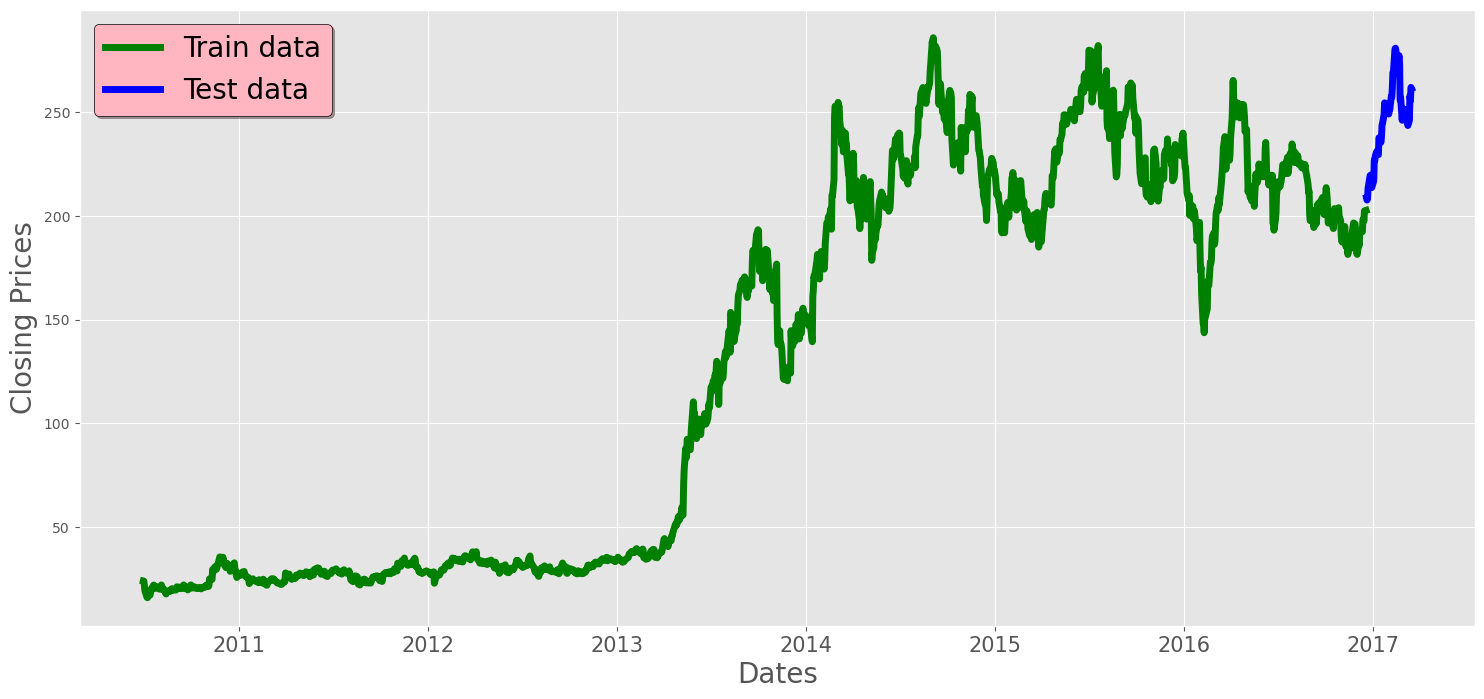

In [45]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Closing Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.plot(train_data, 'green', label='Train data', linewidth = 5)
plt.plot(test_data, 'blue', label='Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

In [46]:
# ARIMA

In [47]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [48]:
history=[x for x in train_data]

In [49]:
history

[23.889999,
 23.83,
 21.959999,
 19.200001,
 16.110001,
 15.8,
 17.459999,
 17.4,
 17.049999,
 18.139999,
 19.84,
 19.889999,
 20.639999,
 21.91,
 20.299999,
 20.219999,
 21.0,
 21.290001,
 20.950001,
 20.549999,
 20.719999,
 20.35,
 19.940001,
 20.92,
 21.950001,
 21.26,
 20.450001,
 19.59,
 19.6,
 19.030001,
 17.9,
 17.6,
 18.32,
 18.780001,
 19.15,
 18.77,
 18.790001,
 19.1,
 20.129999,
 19.200001,
 19.9,
 19.75,
 19.700001,
 19.870001,
 19.48,
 20.450001,
 21.059999,
 21.049999,
 20.540001,
 20.9,
 20.709999,
 20.17,
 20.719999,
 21.120001,
 21.98,
 20.940001,
 20.23,
 21.059999,
 20.77,
 19.870001,
 19.559999,
 20.1,
 20.530001,
 21.4,
 21.98,
 20.41,
 20.6,
 20.99,
 21.120001,
 20.459999,
 20.43,
 20.43,
 20.24,
 20.24,
 20.540001,
 20.75,
 20.540001,
 20.23,
 20.049999,
 20.65,
 20.75,
 20.719999,
 20.85,
 21.360001,
 21.0,
 21.190001,
 21.84,
 21.41,
 21.25,
 21.77,
 24.9,
 24.440001,
 24.98,
 24.629999,
 29.360001,
 28.040001,
 29.84,
 30.799999,
 29.67,
 29.49,
 29.889999,
 3

In [50]:
model = ARIMA(history,order=(1,1,1))

In [51]:
model=model.fit()

In [52]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1632
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4718.228
Date:                Sat, 24 Aug 2024   AIC                           9442.457
Time:                        16:18:16   BIC                           9458.648
Sample:                             0   HQIC                          9448.463
                               - 1632                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1010      0.632     -0.160      0.873      -1.340       1.138
ma.L1          0.1321      0.632      0.209      0.834      -1.106       1.370
sigma2        19.0632      0.312     61.075      0.000      18.451      19.675
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3726.66
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              29.61   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
model.forecast()

array([202.7166936])

In [54]:
test_data[0]

208.789993

In [55]:
mean_squared_error([test_data[0]],[model.forecast()[0]])

36.884965648975665

In [56]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [57]:
# evaluate different combinations of p, d and q values for an ARIMA model to get the best order for ARIMA Model
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


In [58]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=117.438
ARIMA(0, 0, 1) RMSE=60.356
ARIMA(0, 0, 2) RMSE=35.021
ARIMA(0, 1, 0) RMSE=4.989
ARIMA(0, 1, 1) RMSE=4.986
ARIMA(0, 1, 2) RMSE=4.991
ARIMA(0, 2, 0) RMSE=6.890
ARIMA(0, 2, 1) RMSE=4.968
ARIMA(0, 2, 2) RMSE=4.966
ARIMA(1, 0, 0) RMSE=5.012
ARIMA(1, 0, 1) RMSE=5.009
ARIMA(1, 0, 2) RMSE=5.013
ARIMA(1, 1, 0) RMSE=4.985
ARIMA(1, 1, 1) RMSE=4.988
ARIMA(1, 1, 2) RMSE=5.004
ARIMA(1, 2, 0) RMSE=5.753
ARIMA(1, 2, 1) RMSE=4.965
ARIMA(1, 2, 2) RMSE=5.000
ARIMA(2, 0, 0) RMSE=5.008
ARIMA(2, 0, 1) RMSE=5.013
ARIMA(2, 0, 2) RMSE=5.004
ARIMA(2, 1, 0) RMSE=4.992
ARIMA(2, 1, 1) RMSE=5.014
ARIMA(2, 1, 2) RMSE=4.993
ARIMA(2, 2, 0) RMSE=5.676
ARIMA(2, 2, 1) RMSE=4.971
ARIMA(2, 2, 2) RMSE=4.998
Best ARIMA(1, 2, 1) RMSE=4.965


In [59]:
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
for p in p_values:
        for d in d_values:
            for q in q_values:
                print(p,d,q)

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


In [77]:
for t in range(len(test_data)):
    model = ARIMA(history, order=(1, 1, 0))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha=0.05)  # Unpack only fc (single element)
    predictions.append(fc[0])  # Access the first element of the returned list
    # No need to append conf_list (unless you configure to return confidence intervals)
    history.append(test_data[t])

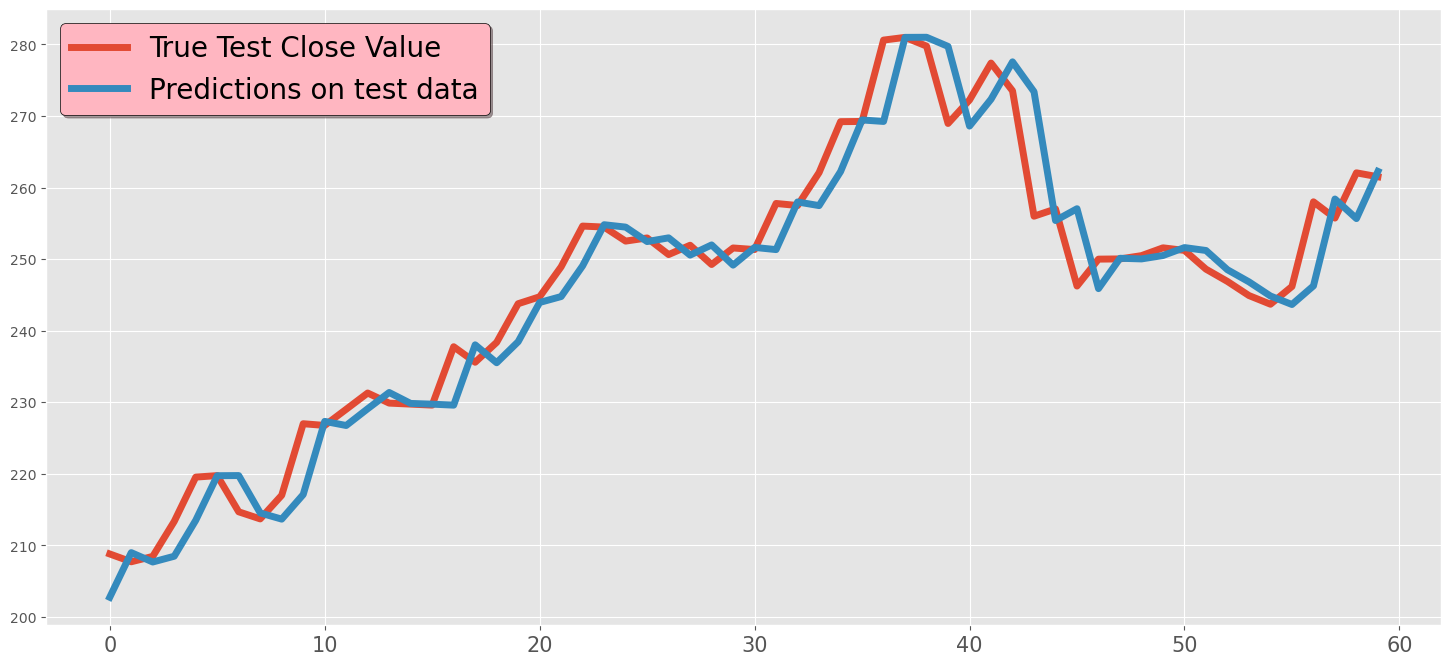

In [78]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [80]:
import statsmodels.api as sm
history=[x for x in train_data]
predictions=list()
conf_list=list()
for t in range(len(test_data)):
    model=sm.tsa.statespace.SARIMAX(history,order=(0,1,0),seasonal_order=(1,1,1,3))
    model_fit=model.fit()
    fc=model_fit.forecast(alpha=0.05)
    predictions.append(fc)
    history.append(test_data[t])
print("RMSE of ARIMA Model:",np.sqrt(mean_squared_error(test_data,predictions)))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95431D+00    |proj g|=  1.26683D-01

At iterate    5    f=  2.89831D+00    |proj g|=  8.39852D-03

At iterate   10    f=  2.89247D+00    |proj g|=  1.13179D-02

At iterate   15    f=  2.89187D+00    |proj g|=  2.36616D-03

At iterate   20    f=  2.89184D+00    |proj g|=  9.99369D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     24      1     0     0   9.994D-06   2.892D+00
  F =   2.8918364309886173     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95442D+00    |proj g|=  1.26630D-01

At iterate    5    f=  2.89874D+00    |proj g|=  8.14695D-03

At iterate   10    f=  2.89289D+00    |proj g|=  7.40622D-03

At iterate   15    f=  2.89220D+00    |proj g|=  3.30113D-04

At iterate   20    f=  2.89213D+00    |proj g|=  3.41489D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     27      1     0     0   9.463D-05   2.892D+00
  F =   2.8921323522564082     

CONVERG

 This problem is unconstrained.



At iterate   15    f=  2.89189D+00    |proj g|=  9.59548D-04

At iterate   20    f=  2.89185D+00    |proj g|=  4.70156D-05

At iterate   25    f=  2.89184D+00    |proj g|=  9.96488D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     32      1     0     0   8.190D-06   2.892D+00
  F =   2.8918413514012480     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95397D+00    |proj g|=  1.26817D-01


 This problem is unconstrained.



At iterate    5    f=  2.89819D+00    |proj g|=  7.89644D-03

At iterate   10    f=  2.89237D+00    |proj g|=  5.34954D-03

At iterate   15    f=  2.89159D+00    |proj g|=  5.38543D-04

At iterate   20    f=  2.89154D+00    |proj g|=  2.75663D-05

At iterate   25    f=  2.89154D+00    |proj g|=  2.07918D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     33      1     0     0   4.473D-06   2.892D+00
  F =   2.8915401845381341     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   10    f=  2.89220D+00    |proj g|=  3.59019D-03

At iterate   15    f=  2.89168D+00    |proj g|=  2.63773D-04

At iterate   20    f=  2.89165D+00    |proj g|=  1.09968D-03

At iterate   25    f=  2.89165D+00    |proj g|=  1.53450D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     33      1     0     0   4.253D-05   2.892D+00
  F =   2.8916484910757418     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  2.89256D+00    |proj g|=  9.09292D-03

At iterate   15    f=  2.89199D+00    |proj g|=  9.58645D-04

At iterate   20    f=  2.89194D+00    |proj g|=  2.11459D-04

At iterate   25    f=  2.89193D+00    |proj g|=  2.26052D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     35      1     0     0   2.010D-05   2.892D+00
  F =   2.8919312493551135     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  2.89826D+00    |proj g|=  7.30214D-03

At iterate   10    f=  2.89223D+00    |proj g|=  7.90330D-03

At iterate   15    f=  2.89168D+00    |proj g|=  1.69750D-03

At iterate   20    f=  2.89163D+00    |proj g|=  1.41237D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     27      1     0     0   6.023D-06   2.892D+00
  F =   2.8916289177644257     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  2.89174D+00    |proj g|=  2.41012D-04

At iterate   20    f=  2.89171D+00    |proj g|=  3.95140D-04

At iterate   25    f=  2.89171D+00    |proj g|=  1.15885D-04

At iterate   30    f=  2.89171D+00    |proj g|=  2.24427D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     35      1     0     0   4.208D-06   2.892D+00
  F =   2.8917075257112019     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95363D+00    |proj g|=  1.26642D-01

At iterate    5    f=  2.89800D+00    |proj g|=  7.82672D-03

At iterate   10    f=  2.89226D+00    |proj g|=  5.64631D-03

At iterate   15    f=  2.89147D+00    |proj g|=  7.16752D-04

At iterate   20    f=  2.89143D+00    |proj g|=  7.80514D-04

At iterate   25    f=  2.89142D+00    |proj g|=  5.90942D-05

At iterate   30    f=  2.89142D+00    |proj g|=  3.64140D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   15    f=  2.89131D+00    |proj g|=  1.85600D-03

At iterate   20    f=  2.89126D+00    |proj g|=  2.16498D-05

At iterate   25    f=  2.89126D+00    |proj g|=  1.12085D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     30      1     0     0   7.845D-06   2.891D+00
  F =   2.8912598822075681     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95438D+00    |proj g|=  1.26102D-01


 This problem is unconstrained.



At iterate    5    f=  2.89934D+00    |proj g|=  8.95929D-03

At iterate   10    f=  2.89347D+00    |proj g|=  4.82572D-03

At iterate   15    f=  2.89262D+00    |proj g|=  1.49233D-04

At iterate   20    f=  2.89254D+00    |proj g|=  2.83445D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     31      1     0     0   1.145D-05   2.893D+00
  F =   2.8925384915975267     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95413D+00    |proj g|=  1.26204D-01

At iterate    5    f=  2.89905D+00    |proj g|=  8.77375D-03

At iterate   10    f=  2.89311D+00    |proj g|=  6.44096D-03

At iterate   15    f=  2.89229D+00    |proj g|=  1.24654D-03

At iterate   20    f=  2.89224D+00    |proj g|=  9.50175D-05

At iterate   25    f=  2.89224D+00    |proj g|=  1.54983D-04

At iterate   30    f=  2.89224D+00    |proj g|=  1.79003D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   15    f=  2.89207D+00    |proj g|=  1.12275D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     24      1     0     0   6.257D-06   2.892D+00
  F =   2.8920067420367204     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95361D+00    |proj g|=  1.25722D-01

At iterate    5    f=  2.89872D+00    |proj g|=  8.92542D-03


 This problem is unconstrained.



At iterate   10    f=  2.89274D+00    |proj g|=  4.92639D-03

At iterate   15    f=  2.89188D+00    |proj g|=  1.09188D-04

At iterate   20    f=  2.89180D+00    |proj g|=  2.60876D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     27      1     0     0   8.599D-05   2.892D+00
  F =   2.8918042437888656     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95350D+00    |proj g|=  1.25517D-01

At iterate    5    f=  2.89851D+00    |proj g|=  8.94005D-03

At iterate   10    f=  2.89244D+00    |proj g|=  6.20540D-03

At iterate   15    f=  2.89159D+00    |proj g|=  8.57785D-04

At iterate   20    f=  2.89154D+00    |proj g|=  6.01835D-05

At iterate   25    f=  2.89153D+00    |proj g|=  4.69123D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     32      1     0     0   

 This problem is unconstrained.



At iterate   10    f=  2.89214D+00    |proj g|=  6.13484D-03

At iterate   15    f=  2.89129D+00    |proj g|=  8.02333D-04

At iterate   20    f=  2.89124D+00    |proj g|=  2.38992D-04

At iterate   25    f=  2.89123D+00    |proj g|=  6.25380D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     29      1     0     0   6.254D-06   2.891D+00
  F =   2.8912329681834330     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  2.89183D+00    |proj g|=  6.25851D-03

At iterate   15    f=  2.89099D+00    |proj g|=  1.12323D-03

At iterate   20    f=  2.89093D+00    |proj g|=  3.27624D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     29      1     0     0   9.666D-06   2.891D+00
  F =   2.8909312848326412     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95316D+00    |proj g|=  1.26173D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  2.89256D+00    |proj g|=  5.91088D-03

At iterate   15    f=  2.89171D+00    |proj g|=  5.87973D-04

At iterate   20    f=  2.89165D+00    |proj g|=  4.21800D-05

At iterate   25    f=  2.89165D+00    |proj g|=  3.58601D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     33      1     0     0   4.068D-06   2.892D+00
  F =   2.8916488812543397     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  2.89152D+00    |proj g|=  2.32745D-05

At iterate   20    f=  2.89145D+00    |proj g|=  2.98351D-05

At iterate   25    f=  2.89145D+00    |proj g|=  1.59304D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     35      1     0     0   6.444D-06   2.891D+00
  F =   2.8914450479131690     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95257D+00    |proj g|=  1.26443D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  2.89136D+00    |proj g|=  8.95770D-05

At iterate   20    f=  2.89128D+00    |proj g|=  2.46401D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     31      1     0     0   2.651D-05   2.891D+00
  F =   2.8912717811558912     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95252D+00    |proj g|=  1.26581D-01


 This problem is unconstrained.



At iterate    5    f=  2.89802D+00    |proj g|=  7.94604D-03

At iterate   10    f=  2.89236D+00    |proj g|=  5.88125D-03

At iterate   15    f=  2.89150D+00    |proj g|=  6.00681D-04

At iterate   20    f=  2.89144D+00    |proj g|=  2.57887D-05

At iterate   25    f=  2.89144D+00    |proj g|=  9.63688D-05

At iterate   30    f=  2.89144D+00    |proj g|=  3.53791D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     37      1     0     0   9.395D-06   2.891D+00
  F =   2.8914378174709081     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  2.89123D+00    |proj g|=  1.48645D-04

At iterate   20    f=  2.89115D+00    |proj g|=  2.40176D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     27      1     0     0   7.958D-05   2.891D+00
  F =   2.8911495561760368     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95199D+00    |proj g|=  1.26636D-01

At iterate    5    f=  2.89775D+00    |proj g|=  8.03655D-03



 This problem is unconstrained.


At iterate   10    f=  2.89210D+00    |proj g|=  5.16345D-03

At iterate   15    f=  2.89122D+00    |proj g|=  1.09038D-04

At iterate   20    f=  2.89114D+00    |proj g|=  2.31263D-05

At iterate   25    f=  2.89113D+00    |proj g|=  1.22179D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     35      1     0     0   4.929D-06   2.891D+00
  F =   2.8911326937633590     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At itera

 This problem is unconstrained.


At iterate   10    f=  2.89223D+00    |proj g|=  1.30484D-02

At iterate   15    f=  2.89144D+00    |proj g|=  1.95090D-03

At iterate   20    f=  2.89135D+00    |proj g|=  6.14174D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     29      1     0     0   9.947D-06   2.891D+00
  F =   2.8913398594759157     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95162D+00    |proj g|=  1.26299D-01

At itera

 This problem is unconstrained.



At iterate   10    f=  2.89199D+00    |proj g|=  5.93353D-03

At iterate   15    f=  2.89112D+00    |proj g|=  6.55818D-04

At iterate   20    f=  2.89105D+00    |proj g|=  4.16106D-04

At iterate   25    f=  2.89104D+00    |proj g|=  2.94249D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     34      1     0     0   8.339D-06   2.891D+00
  F =   2.8910405970544408     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  2.89089D+00    |proj g|=  2.33528D-04

At iterate   20    f=  2.89080D+00    |proj g|=  2.24313D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     27      1     0     0   6.359D-05   2.891D+00
  F =   2.8908012481565923     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95133D+00    |proj g|=  1.26541D-01

At iterate    5    f=  2.89694D+00    |proj g|=  8.07080D-03


 This problem is unconstrained.



At iterate   10    f=  2.89146D+00    |proj g|=  4.63987D-03

At iterate   15    f=  2.89059D+00    |proj g|=  2.13716D-04

At iterate   20    f=  2.89050D+00    |proj g|=  2.42398D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     27      1     0     0   8.260D-05   2.891D+00
  F =   2.8905032720736159     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95111D+00    |proj g|=  1.26528D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  2.89037D+00    |proj g|=  5.90815D-04

At iterate   20    f=  2.89031D+00    |proj g|=  2.80184D-05

At iterate   25    f=  2.89031D+00    |proj g|=  3.84786D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     33      1     0     0   8.206D-06   2.890D+00
  F =   2.8903053312889759     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95080D+00    |proj g|=  1.26518D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  2.89011D+00    |proj g|=  2.04859D-03

At iterate   20    f=  2.89004D+00    |proj g|=  2.97874D-05

At iterate   25    f=  2.89003D+00    |proj g|=  9.66613D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     30      1     0     0   9.666D-06   2.890D+00
  F =   2.8900324183690373     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95114D+00    |proj g|=  1.26684D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  2.89083D+00    |proj g|=  4.87948D-03

At iterate   15    f=  2.88995D+00    |proj g|=  1.43182D-04

At iterate   20    f=  2.88987D+00    |proj g|=  2.29166D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     27      1     0     0   8.415D-05   2.890D+00
  F =   2.8898658095799377     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95094D+00    |proj g|=  1.26662D-01

At iterate    5    f=  2.89618D+00    |proj g|=  8.06225D-03

At iterate   10    f=  2.89060D+00    |proj g|=  4.42807D-03

At iterate   15    f=  2.88972D+00    |proj g|=  2.26235D-04

At iterate   20    f=  2.88963D+00    |proj g|=  2.21593D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     27      1     0     0   6.464D-05   2.890D+00
  F =   2.8896275252967536     

CONVERG

 This problem is unconstrained.



At iterate   10    f=  2.89029D+00    |proj g|=  4.75528D-03

At iterate   15    f=  2.88941D+00    |proj g|=  1.72797D-04

At iterate   20    f=  2.88933D+00    |proj g|=  2.28336D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     27      1     0     0   7.589D-05   2.889D+00
  F =   2.8893282387309256     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95058D+00    |proj g|=  1.26840D-01


 This problem is unconstrained.



At iterate    5    f=  2.89599D+00    |proj g|=  7.93922D-03

At iterate   10    f=  2.89059D+00    |proj g|=  4.75451D-03

At iterate   15    f=  2.88973D+00    |proj g|=  1.71733D-04

At iterate   20    f=  2.88964D+00    |proj g|=  2.33801D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     27      1     0     0   7.975D-05   2.890D+00
  F =   2.8896442501890554     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.


At iterate   10    f=  2.89030D+00    |proj g|=  4.70540D-03

At iterate   15    f=  2.88943D+00    |proj g|=  1.81475D-04

At iterate   20    f=  2.88935D+00    |proj g|=  2.33424D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     27      1     0     0   7.889D-05   2.889D+00
  F =   2.8893499131636968     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE


 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95008D+00    |proj g|=  1.26936D-01

At iterate    5    f=  2.89572D+00    |proj g|=  7.85483D-03

At iterate   10    f=  2.89036D+00    |proj g|=  4.85678D-03

At iterate   15    f=  2.88947D+00    |proj g|=  1.61596D-04

At iterate   20    f=  2.88939D+00    |proj g|=  2.23034D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     27      1     0     0   8.092D-05   2.889D+00
  F =   2.8893889602343483     

CONVERGENCE: REL_REDUCTION_OF_F_<

 This problem is unconstrained.



At iterate   15    f=  2.88992D+00    |proj g|=  5.26575D-04

At iterate   20    f=  2.88988D+00    |proj g|=  1.48828D-04

At iterate   25    f=  2.88988D+00    |proj g|=  6.52198D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     29      1     0     0   6.522D-06   2.890D+00
  F =   2.8898762934039168     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.94966D+00    |proj g|=  1.27333D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  2.89023D+00    |proj g|=  2.18079D-03

At iterate   15    f=  2.88962D+00    |proj g|=  1.74906D-04

At iterate   20    f=  2.88958D+00    |proj g|=  7.29792D-04

At iterate   25    f=  2.88958D+00    |proj g|=  7.59951D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     30      1     0     0   5.394D-06   2.890D+00
  F =   2.8895788159178033     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  2.89139D+00    |proj g|=  3.04186D-03

At iterate   20    f=  2.89136D+00    |proj g|=  3.07419D-04

At iterate   25    f=  2.89135D+00    |proj g|=  2.30693D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     31      1     0     0   1.213D-05   2.891D+00
  F =   2.8913517006023768     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95060D+00    |proj g|=  1.27370D-01


 This problem is unconstrained.



At iterate    5    f=  2.89711D+00    |proj g|=  6.51944D-03

At iterate   10    f=  2.89174D+00    |proj g|=  2.83405D-03

At iterate   15    f=  2.89110D+00    |proj g|=  2.04874D-04

At iterate   20    f=  2.89106D+00    |proj g|=  1.67057D-04

At iterate   25    f=  2.89106D+00    |proj g|=  1.83976D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     30      1     0     0   6.577D-06   2.891D+00
  F =   2.8910549963664001     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   15    f=  2.89087D+00    |proj g|=  2.37102D-04

At iterate   20    f=  2.89080D+00    |proj g|=  6.61767D-05

At iterate   25    f=  2.89079D+00    |proj g|=  1.04541D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     34      1     0     0   8.017D-06   2.891D+00
  F =   2.8907931587759337     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95243D+00    |proj g|=  1.27886D-01

At iterate    5    f=  2.89830D+00    |proj g|=  6.50109D-03

At iterate   10    f=  2.89291D+00    |proj g|=  2.80895D-03

At iterate   15    f=  2.89229D+00    |proj g|=  2.27016D-04

At iterate   20    f=  2.89226D+00    |proj g|=  1.34110D-04

At iterate   25    f=  2.89225D+00    |proj g|=  4.42189D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     30      1     0     0   

 This problem is unconstrained.



At iterate   10    f=  2.89275D+00    |proj g|=  2.91795D-03

At iterate   15    f=  2.89215D+00    |proj g|=  4.91910D-04

At iterate   20    f=  2.89211D+00    |proj g|=  1.56768D-03

At iterate   25    f=  2.89211D+00    |proj g|=  1.77409D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     31      1     0     0   9.859D-06   2.892D+00
  F =   2.8921070063699958     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  2.89223D+00    |proj g|=  3.29964D-04

At iterate   20    f=  2.89218D+00    |proj g|=  1.95729D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     28      1     0     0   9.984D-06   2.892D+00
  F =   2.8921761478280756     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95213D+00    |proj g|=  1.28656D-01

At iterate    5    f=  2.89833D+00    |proj g|=  6.23661D-03


 This problem is unconstrained.



At iterate   10    f=  2.89274D+00    |proj g|=  7.95820D-04

At iterate   15    f=  2.89218D+00    |proj g|=  1.00731D-03

At iterate   20    f=  2.89214D+00    |proj g|=  1.07991D-04

At iterate   25    f=  2.89214D+00    |proj g|=  6.49303D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     30      1     0     0   6.493D-06   2.892D+00
  F =   2.8921379267033784     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  2.89672D+00    |proj g|=  6.34135D-04

At iterate   20    f=  2.89667D+00    |proj g|=  1.16777D-04

At iterate   25    f=  2.89667D+00    |proj g|=  1.02476D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     34      1     0     0   8.675D-06   2.897D+00
  F =   2.8966690820011176     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95776D+00    |proj g|=  1.26505D-01


 This problem is unconstrained.



At iterate    5    f=  2.90312D+00    |proj g|=  5.82871D-03

At iterate   10    f=  2.89703D+00    |proj g|=  2.02239D-03

At iterate   15    f=  2.89643D+00    |proj g|=  6.13363D-04

At iterate   20    f=  2.89639D+00    |proj g|=  1.48866D-04

At iterate   25    f=  2.89638D+00    |proj g|=  7.57325D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     31      1     0     0   8.946D-06   2.896D+00
  F =   2.8963825308816742     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate    5    f=  2.90474D+00    |proj g|=  8.97310D-03

At iterate   10    f=  2.89863D+00    |proj g|=  1.02495D-02

At iterate   15    f=  2.89797D+00    |proj g|=  3.34233D-04

At iterate   20    f=  2.89790D+00    |proj g|=  4.22858D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     26      1     0     0   2.775D-05   2.898D+00
  F =   2.8978994452297400     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  2.89839D+00    |proj g|=  5.91024D-03

At iterate   15    f=  2.89782D+00    |proj g|=  1.49499D-05

At iterate   20    f=  2.89776D+00    |proj g|=  1.12748D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     27      1     0     0   8.320D-06   2.898D+00
  F =   2.8977602298360923     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95966D+00    |proj g|=  1.24009D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  2.89752D+00    |proj g|=  7.31673D-04

At iterate   20    f=  2.89747D+00    |proj g|=  3.64259D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     27      1     0     0   9.222D-06   2.897D+00
  F =   2.8974642795042307     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95934D+00    |proj g|=  1.24324D-01


 This problem is unconstrained.



At iterate    5    f=  2.90401D+00    |proj g|=  8.82940D-03

At iterate   10    f=  2.89782D+00    |proj g|=  6.66729D-03

At iterate   15    f=  2.89721D+00    |proj g|=  2.90388D-04

At iterate   20    f=  2.89717D+00    |proj g|=  1.79497D-04

At iterate   25    f=  2.89717D+00    |proj g|=  6.04548D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     30      1     0     0   6.045D-06   2.897D+00
  F =   2.8971691330736196     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   15    f=  2.89696D+00    |proj g|=  2.87613D-04

At iterate   20    f=  2.89689D+00    |proj g|=  1.33302D-04

At iterate   25    f=  2.89689D+00    |proj g|=  8.72399D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     31      1     0     0   8.724D-05   2.897D+00
  F =   2.8968896139541518     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95867D+00    |proj g|=  1.25604D-01


 This problem is unconstrained.



At iterate    5    f=  2.90339D+00    |proj g|=  8.83360D-03

At iterate   10    f=  2.89730D+00    |proj g|=  8.80547D-03

At iterate   15    f=  2.89667D+00    |proj g|=  2.89972D-04

At iterate   20    f=  2.89661D+00    |proj g|=  3.43695D-05

At iterate   25    f=  2.89660D+00    |proj g|=  3.00657D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     31      1     0     0   3.007D-05   2.897D+00
  F =   2.8966006894841110     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate   15    f=  2.89648D+00    |proj g|=  1.60896D-03

At iterate   20    f=  2.89641D+00    |proj g|=  1.11948D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     26      1     0     0   6.393D-05   2.896D+00
  F =   2.8964110684144413     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95814D+00    |proj g|=  1.26642D-01

At iterate    5    f=  2.90300D+00    |proj g|=  8.83046D-03


 This problem is unconstrained.



At iterate   10    f=  2.89697D+00    |proj g|=  1.26920D-02

At iterate   15    f=  2.89625D+00    |proj g|=  1.81892D-03

At iterate   20    f=  2.89617D+00    |proj g|=  6.73507D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     29      1     0     0   9.916D-06   2.896D+00
  F =   2.8961634679899735     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95801D+00    |proj g|=  1.26534D-01


 This problem is unconstrained.



At iterate    5    f=  2.90277D+00    |proj g|=  8.96623D-03

At iterate   10    f=  2.89676D+00    |proj g|=  1.28290D-02

At iterate   15    f=  2.89603D+00    |proj g|=  1.90186D-03

At iterate   20    f=  2.89595D+00    |proj g|=  8.18448D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     29      1     0     0   9.917D-06   2.896D+00
  F =   2.8959485443875734     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  2.89574D+00    |proj g|=  1.05178D-03

At iterate   20    f=  2.89568D+00    |proj g|=  2.11090D-04

At iterate   25    f=  2.89568D+00    |proj g|=  2.71886D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     33      1     0     0   5.640D-06   2.896D+00
  F =   2.8956746928374653     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95814D+00    |proj g|=  1.25868D-01


 This problem is unconstrained.



At iterate    5    f=  2.90231D+00    |proj g|=  9.80449D-03

At iterate   10    f=  2.89634D+00    |proj g|=  7.76453D-03

At iterate   15    f=  2.89555D+00    |proj g|=  4.15861D-04

At iterate   20    f=  2.89547D+00    |proj g|=  2.77338D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     27      1     0     0   7.983D-05   2.895D+00
  F =   2.8954672290325543     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  2.89728D+00    |proj g|=  9.10304D-03

At iterate   20    f=  2.89720D+00    |proj g|=  1.69948D-04

At iterate   25    f=  2.89719D+00    |proj g|=  1.97774D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     34      1     0     0   5.661D-06   2.897D+00
  F =   2.8971906038062585     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95942D+00    |proj g|=  1.25707D-01

At iter

 This problem is unconstrained.



At iterate   20    f=  2.89698D+00    |proj g|=  1.18716D-04

At iterate   25    f=  2.89697D+00    |proj g|=  2.81724D-05

At iterate   30    f=  2.89697D+00    |proj g|=  1.17623D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     37      1     0     0   8.189D-06   2.897D+00
  F =   2.8969728859768868     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95948D+00    |proj g|=  1.25701D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  2.89734D+00    |proj g|=  9.09402D-04

At iterate   20    f=  2.89728D+00    |proj g|=  1.74288D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     27      1     0     0   4.578D-05   2.897D+00
  F =   2.8972770605498983     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RMSE of ARIMA Model: 4.962456288043873


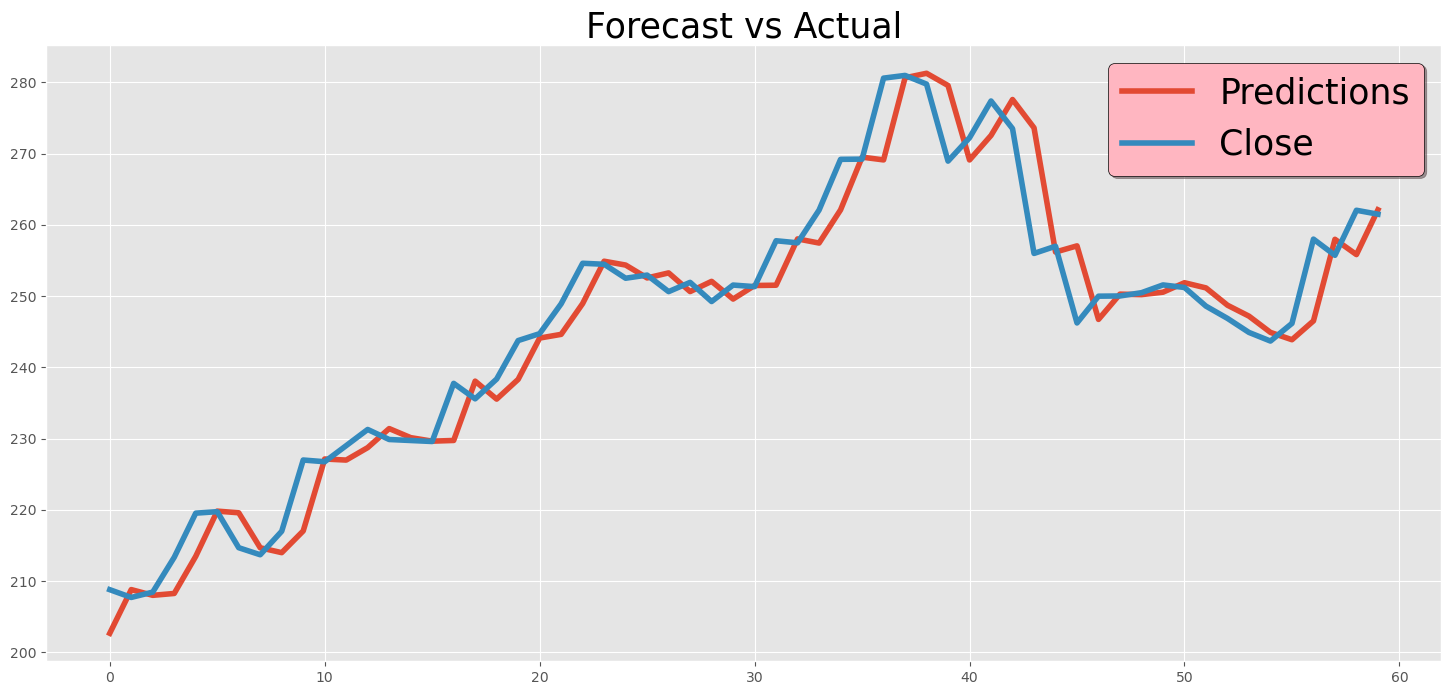

In [81]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')

In [82]:
df_Close

Date
2010-06-29     23.889999
2010-06-30     23.830000
2010-07-01     21.959999
2010-07-02     19.200001
2010-07-06     16.110001
                 ...    
2017-03-13    246.169998
2017-03-14    258.000000
2017-03-15    255.729996
2017-03-16    262.049988
2017-03-17    261.500000
Name: Close, Length: 1692, dtype: float64

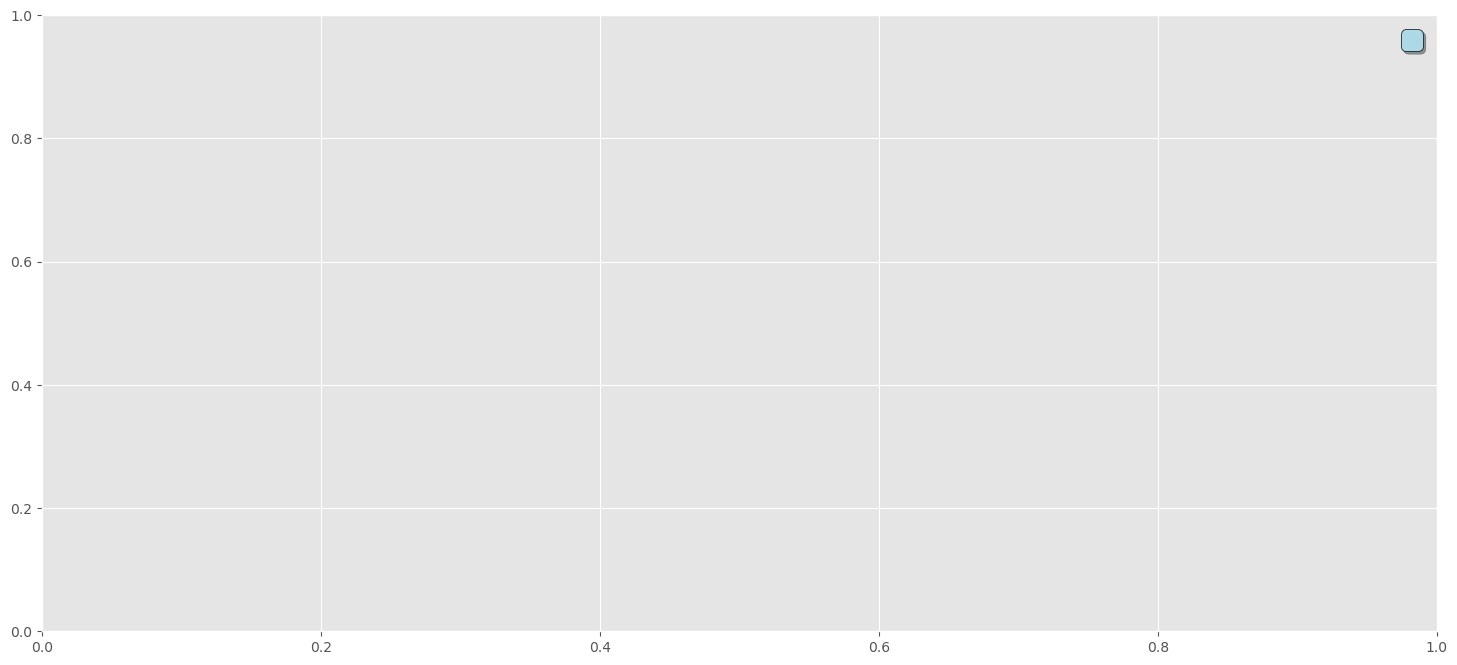

In [101]:
fig=plt.figure(figsize=(18,8))
ax1=fig.add_subplot(111)
model_fit.predict(start=1,end=len(df_Close)+365,ax=ax1)
plt.grid("both")
plt.legend(["forecast","close","95% confidence interval"],fontsize=20,shadow=True,facecolor="lightblue",edgecolor="k")
plt.show()

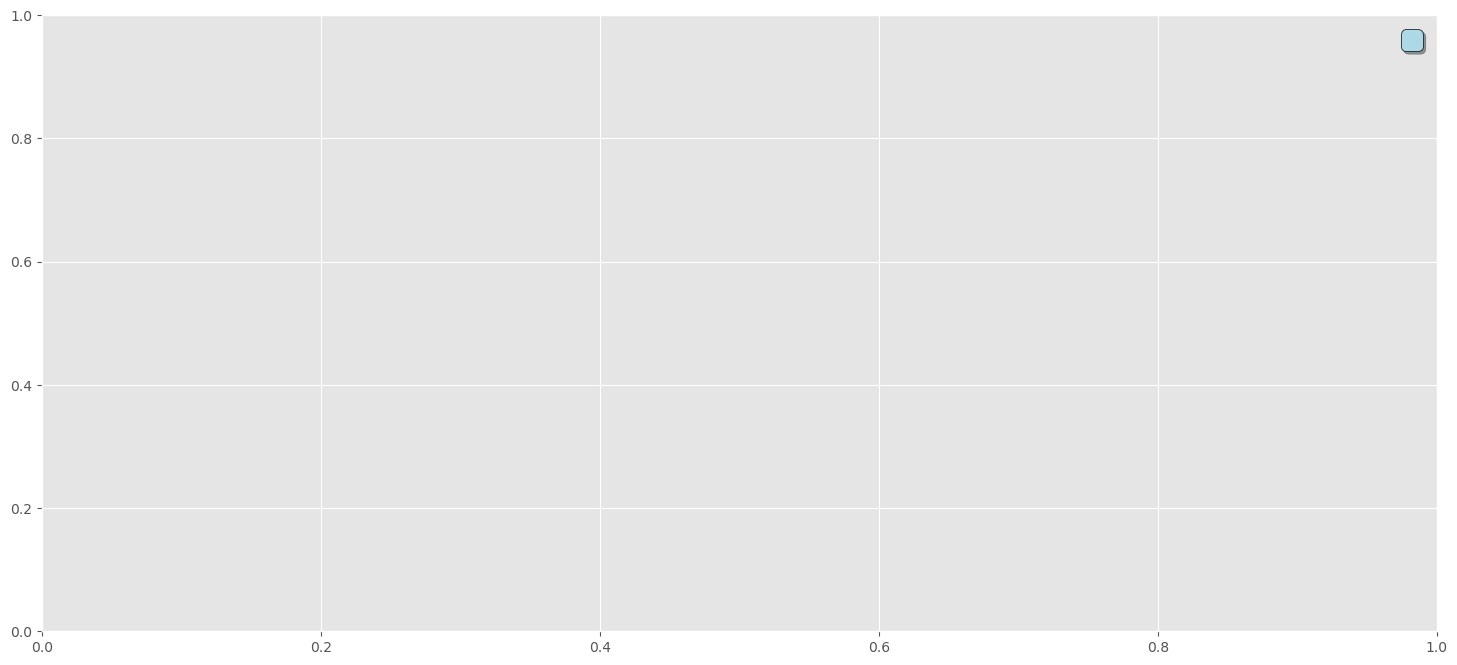

In [102]:
fig=plt.figure(figsize=(18,8))
ax1=fig.add_subplot(111)
model_fit.(start=1,end=len(df_Close)+365,ax=ax1)
plt.grid("both")
plt.legend(["forecast","close","95% confidence interval"],fontsize=20,shadow=True,facecolor="lightblue",edgecolor="k")
plt.show()